In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
def load_dataset_small(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Function to compute hinge loss with L2 regularization
def hinge_loss(w, x, y, lambda_reg):
    return max(0, 1 - y * np.dot(w, x)) + (lambda_reg / 2) * np.linalg.norm(w)**2

# Function to compute the gradient of hinge loss with L2 regularization
def hinge_loss_gradient(w, x, y, lambda_reg):
    if y * np.dot(w, x) < 1:
        return -y * x + lambda_reg * w
    else:
        return lambda_reg * w

# Optional projection to limit the norm of w
def project(w):
    norm = np.linalg.norm(w)
    if norm > 1:
        w = w / norm
    return w

# Online SVM with regularization
def online_svm(X_train, y_train, X_test, y_test, eta_0, lambda_reg, epochs=1):
    n_features = X_train.shape[1]
    w = np.zeros(n_features)
    accuracies = []

    for epoch in range(epochs):
        for t, (x_t, y_t) in enumerate(zip(X_train, y_train)):
            eta_t = eta_0 * (1 / np.sqrt(t + 1))
            w -= eta_t * hinge_loss_gradient(w, x_t, y_t, lambda_reg)
            w = project(w)
            # calculate class of x_t
            y_pred = np.sign(np.dot(w, x_t))
            # calculate accuracy
            if y_pred == y_t:
                accuracies.append(1)
            else:
                accuracies.append(0)

    return w, accuracies

# Function to test the model accuracy
def test_online_svm_accuracy(X, y, eta_0, lambda_reg, epochs=1, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    final_weights, accuracies = online_svm(X_train, y_train, X_test, y_test, eta_0, lambda_reg, epochs)
    return accuracies



import matplotlib.pyplot as plt

# Define different parameter sets for eta_0 and lambda_reg
parameter_sets = [
    (1,0.01),
    (10,1),
    (100,10),
    (1000,100),
    (0.1,0.0),
    (1e-3, 1e-2),
    (1e-3, 1e-3),
    (1e-4, 1e-2),
    (1e-4, 1e-3),
    (1e-4, 1e-4),
    (1e-5, 1e-2),
    (1e-5, 1e-3),
    (1e-5, 1e-4),
    (1e-6, 1e-2),
    (1e-6, 1e-3),
    (1e-6, 1e-4)
]

# Load dataset
X, y = load_dataset_small("toydata_large.csv")  # Update the file path accordingly

# Store results for plotting
results = []

# Test each set of parameters
for eta_0, lambda_reg in parameter_sets:
    accuracies = test_online_svm_accuracy(X, y, eta_0, lambda_reg, epochs=1)
    global_accuracy = sum(accuracies)/len(accuracies)
    # print results
    print(f"eta_0={eta_0}, lambda_reg={lambda_reg}, accuracy={global_accuracy}")
    
    results.append((eta_0, lambda_reg, global_accuracy))

# Function to train and evaluate an SVM model
def train_and_evaluate_svm_python(X, y, kernel='linear', C=1.0):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the SVM classifier
    svm_classifier = SVC(kernel=kernel, C=C)

    # Train the SVM classifier
    svm_classifier.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = svm_classifier.predict(X_test)
    from sklearn.metrics import accuracy_score
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy = train_and_evaluate_svm_python(X, y)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")




eta_0=1, lambda_reg=0.01, accuracy=1.0
eta_0=10, lambda_reg=1, accuracy=0.99969375
eta_0=100, lambda_reg=10, accuracy=0.50003125
eta_0=1000, lambda_reg=100, accuracy=0.49999375
eta_0=0.1, lambda_reg=0.0, accuracy=1.0
eta_0=0.001, lambda_reg=0.01, accuracy=0.99999375
eta_0=0.001, lambda_reg=0.001, accuracy=0.99999375
eta_0=0.0001, lambda_reg=0.01, accuracy=0.99998125
eta_0=0.0001, lambda_reg=0.001, accuracy=0.99998125
eta_0=0.0001, lambda_reg=0.0001, accuracy=0.99998125
eta_0=1e-05, lambda_reg=0.01, accuracy=0.99998125
eta_0=1e-05, lambda_reg=0.001, accuracy=0.99998125
eta_0=1e-05, lambda_reg=0.0001, accuracy=0.99998125
eta_0=1e-06, lambda_reg=0.01, accuracy=0.99998125
eta_0=1e-06, lambda_reg=0.001, accuracy=0.99998125
eta_0=1e-06, lambda_reg=0.0001, accuracy=0.99998125
Accuracy of the SVM model: 100.00%


In [67]:
#plot X and y values
X, y = load_dataset_small("toydata_large.csv")
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy Data')
plt.show()


KeyboardInterrupt: 

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb

def load_display_first_ten_reviews(path='imdb.npz', num_words=10000, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3):
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path=path,
                                                          num_words=num_words,
                                                          skip_top=skip_top,
                                                          maxlen=maxlen,
                                                          seed=seed,
                                                          start_char=start_char,
                                                          oov_char=oov_char,
                                                          index_from=index_from)

    # Get the word index mapping words to their integer indices
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value + index_from - 1, key) for (key, value) in word_index.items()])

    # Display the first 10 reviews with their labels
    for i in range(10):
        # Decode the review
        decoded_review = ' '.join([reverse_word_index.get(word - 3, '?') for word in x_train[i]])
        print(f"Review {i+1} (Label: {'Positive' if y_train[i] == 1 else 'Negative'}):\n{decoded_review}\n")

# Optionally, specify different parameters for the loading function if needed
load_display_first_ten_reviews()


Review 1 (Label: Positive):
? it movie this her won't leading brian hoping which lives wished only foul ? few by hard ? on them her suspense seen if female ? of at fine reason ? those ? going seen actually ? else sex who ? going ya credit that voice they in evil ? however if this the back h as it movie ? vs hung under ? movie had other br this her won't they than i in 100 ? movie that town that br this yourself was ? ? even mean br a night a think ? ? combination filling this fine only superhero one ? better br this they shown ? on did some by here out on festival one the movie br point are we there ? it style this will ? a ? characters never formed i hard ? ? and dignity ? bring by had her won't i'd not written during about and ? ? attempts in movies first ? stupid i together way be buddy when not scenes the fact boundaries was ? done movie with man i'd not fine ? something have hyped was some by are least him on movies ? done which this they disappointing first br this sense ? this p

In [ ]:
# ohne adagrad glaub ich
import numpy as np
import pandas as pd

def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    # Manual standardization
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X, y

def hinge_loss(w, X, y, C):
    # Calculate hinge loss and gradient
    distances = 1 - y * (np.dot(X, w))
    distances[distances < 0] = 0  # max(0, 1-y*(w.x))
    hinge_loss = C * np.mean(distances) + 0.5 * np.sum(w * w)
    return hinge_loss

def hinge_loss_gradient(w, X, y, C):
    # Calculate gradient of hinge loss
    distances = 1 - y * (np.dot(X, w))
    dw = np.zeros(len(w))
    for ind, d in enumerate(distances):
        if d > 0:
            dw += -y[ind] * X[ind]
    dw = dw / len(y)  # Average
    dw = dw * C + w  # Add regularization term
    return dw

def train_svm(X, y, C, eta, epochs, batch_size):
    w = np.zeros(X.shape[1])
    n_batches = int(np.ceil(X.shape[0] / batch_size))
    
    for epoch in range(epochs):
        for b in range(n_batches):
            start = b * batch_size
            end = start + batch_size
            X_batch = X[start:end]
            y_batch = y[start:end]
            grad = hinge_loss_gradient(w, X_batch, y_batch, C)
            # Update rule
            w -= eta * grad
        
        # Logging progress
        
        #print(f"Epoch {epoch + 1}, Loss: {hinge_loss(w, X, y, C)}")
    
    return w

# Parameters
file_path = 'toydata_tiny.csv'  # Replace with your actual file path
C = 0.01  # Regularization parameter
eta = 1.1  # Learning rate
epochs = 5
batch_size = 5

# Load and train SVM
X, y = load_dataset(file_path)
# split into training and testing sets
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
w = train_svm(X, y, C, eta, epochs, batch_size)

def predict(X, w):
    # Calculate predictions based on sign of the dot product
    predictions = np.dot(X, w)
    return np.where(predictions >= 0, 1, -1)

def evaluate_accuracy(X, y, w):
    # Get predictions
    predictions = predict(X, w)
    # Compare predictions with actual labels
    correct_predictions = np.sum(predictions == y)
    total_predictions = len(y)
    accuracy = correct_predictions / total_predictions
    return accuracy * 100  # return as percentage

# Define different sets of parameters to test
parameters = [
    {'C': 0.01, 'eta': 0.1, 'epochs': 2, 'batch_size': 10},
    {'C': 0.1, 'eta': 0.01, 'epochs': 5, 'batch_size': 500},
    {'C': 0.5, 'eta': 0.005, 'epochs': 2, 'batch_size': 200},
    {'C': 1.0, 'eta': 0.001, 'epochs': 7, 'batch_size': 50},
    {'C': 2.0, 'eta': 0.0005, 'epochs': 2, 'batch_size': 100},
    {'C': 0.05, 'eta': 0.05, 'epochs': 3, 'batch_size': 30},
    {'C': 3.0, 'eta': 0.002, 'epochs': 5, 'batch_size': 75},
    {'C': 5.0, 'eta': 0.001, 'epochs': 1, 'batch_size': 250},
    {'C': 10.0, 'eta': 0.0001, 'epochs': 3, 'batch_size': 400},
    {'C': 0.2, 'eta': 0.01, 'epochs': 5, 'batch_size': 25}
]

# Test each parameter configuration
results = []
for params in parameters:
    print(f"Training with parameters: {params}")
    w = train_svm(X, y, params['C'], params['eta'], params['epochs'], params['batch_size'])
    accuracy = evaluate_accuracy(X_test, y_test, w)
    results.append((params, accuracy))
    print(f"Accuracy: {accuracy:.2f}%")

# Display results
for params, accuracy in results:
    print(f"Parameters: {params}, Accuracy: {accuracy:.2f}%")


Training with parameters: {'C': 0.01, 'eta': 0.1, 'epochs': 2, 'batch_size': 10}
Accuracy: 95.00%
Training with parameters: {'C': 0.1, 'eta': 0.01, 'epochs': 5, 'batch_size': 500}
Accuracy: 95.00%
Training with parameters: {'C': 0.5, 'eta': 0.005, 'epochs': 2, 'batch_size': 200}
Accuracy: 95.00%
Training with parameters: {'C': 1.0, 'eta': 0.001, 'epochs': 7, 'batch_size': 50}
Accuracy: 95.00%
Training with parameters: {'C': 2.0, 'eta': 0.0005, 'epochs': 2, 'batch_size': 100}
Accuracy: 95.00%
Training with parameters: {'C': 0.05, 'eta': 0.05, 'epochs': 3, 'batch_size': 30}
Accuracy: 95.00%
Training with parameters: {'C': 3.0, 'eta': 0.002, 'epochs': 5, 'batch_size': 75}
Accuracy: 95.00%
Training with parameters: {'C': 5.0, 'eta': 0.001, 'epochs': 1, 'batch_size': 250}
Accuracy: 95.00%
Training with parameters: {'C': 10.0, 'eta': 0.0001, 'epochs': 3, 'batch_size': 400}
Accuracy: 95.00%
Training with parameters: {'C': 0.2, 'eta': 0.01, 'epochs': 5, 'batch_size': 25}
Accuracy: 95.00%
Param

In [ ]:
# adagard version 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    # Manual standardization
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X, y

def hinge_loss(w, X, y, C):
    # Calculate hinge loss and gradient
    distances = 1 - y * (np.dot(X, w))
    distances[distances < 0] = 0  # max(0, 1-y*(w.x))
    hinge_loss = C * np.mean(distances) + 0.5 * np.sum(w * w)
    return hinge_loss

def hinge_loss_gradient(w, X, y, C):
    # Calculate gradient of hinge loss
    distances = 1 - y * (np.dot(X, w))
    dw = np.zeros(len(w))
    for ind, d in enumerate(distances):
        if d > 0:
            dw += -y[ind] * X[ind]
    dw = dw / len(y)  # Average
    dw = dw * C + w  # Add regularization term
    return dw

def train_svm(X, y, C, initial_eta, epochs, batch_size):
    w = np.zeros(X.shape[1])
    n_batches = int(np.ceil(X.shape[0] / batch_size))
    
    # Initialize gradient accumulation variable
    G = np.zeros(X.shape[1])
    
    for epoch in range(epochs):
        for b in range(n_batches):
            start = b * batch_size
            end = start + batch_size
            X_batch = X[start:end]
            y_batch = y[start:end]
            grad = hinge_loss_gradient(w, X_batch, y_batch, C)
            
            # Accumulate squared gradients
            G += grad ** 2
            
            # Adapt learning rate
            eta = initial_eta / np.sqrt(G + 1e-8)
            
            # Update rule with Adagrad
            w -= eta * grad
        
        # Logging progress
        print(f"Epoch {epoch + 1}, Loss: {hinge_loss(w, X, y, C)}")
    
    return w

# Parameters
file_path = 'toydata_tiny.csv'  # Replace with your actual file path
C = 0.01  # Regularization parameter
initial_eta = 1.1  # Initial learning rate
epochs = 5
batch_size = 5

# Load and train SVM
X, y = load_dataset(file_path)
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)


def evaluate_accuracy(X, y, w):
    # Get predictions
    predictions = predict(X, w)
    # Compare predictions with actual labels
    correct_predictions = np.sum(predictions == y)
    total_predictions = len(y)
    accuracy = correct_predictions / total_predictions
    return accuracy * 100  # return as percentage
# Define different sets of parameters to test
parameters = [
    {'C': 0.01, 'initial_eta': 0.1, 'epochs': 2, 'batch_size': 10},
    {'C': 0.1, 'initial_eta': 0.01, 'epochs': 5, 'batch_size': 500},
    {'C': 0.5, 'initial_eta': 0.005, 'epochs': 2, 'batch_size': 200},
    {'C': 1.0, 'initial_eta': 0.001, 'epochs': 7, 'batch_size': 50},
    {'C': 2.0, 'initial_eta': 0.0005, 'epochs': 2, 'batch_size': 100},
    {'C': 0.05, 'initial_eta': 0.05, 'epochs': 3, 'batch_size': 30},
    {'C': 3.0, 'initial_eta': 0.002, 'epochs': 5, 'batch_size': 75},
    {'C': 5.0, 'initial_eta': 0.001, 'epochs': 1, 'batch_size': 250},
    {'C': 10.0, 'initial_eta': 0.0001, 'epochs': 3, 'batch_size': 400},
    {'C': 0.2, 'initial_eta': 0.01, 'epochs': 5, 'batch_size': 25}
]

# Test each parameter configuration
results = []
for params in parameters:
    print(f"Training with parameters: {params}")
    w = train_svm(X_train, y_train, params['C'], params['initial_eta'], params['epochs'], params['batch_size'])
    accuracy = evaluate_accuracy(X_test, y_test, w)
    results.append((params, accuracy))
    print(f"Accuracy: {accuracy:.2f}%")

# Display results
for params, accuracy in results:
    print(f"Parameters: {params}, Accuracy: {accuracy:.2f}%")


Training with parameters: {'C': 0.01, 'initial_eta': 0.1, 'epochs': 2, 'batch_size': 10}
Epoch 1, Loss: 0.009945266744137577
Epoch 2, Loss: 0.009945268060759002
Accuracy: 95.00%
Training with parameters: {'C': 0.1, 'initial_eta': 0.01, 'epochs': 5, 'batch_size': 500}
Epoch 1, Loss: 0.09871624622692504
Epoch 2, Loss: 0.09798666242188872
Epoch 3, Loss: 0.09747829320008093
Epoch 4, Loss: 0.09709303585674844
Epoch 5, Loss: 0.09678696346255218
Accuracy: 85.00%
Training with parameters: {'C': 0.5, 'initial_eta': 0.005, 'epochs': 2, 'batch_size': 200}
Epoch 1, Loss: 0.4965656123261285
Epoch 2, Loss: 0.49418469871598886
Accuracy: 85.00%
Training with parameters: {'C': 1.0, 'initial_eta': 0.001, 'epochs': 7, 'batch_size': 50}
Epoch 1, Loss: 0.9968122603757017
Epoch 2, Loss: 0.9949493235007117
Epoch 3, Loss: 0.9934916480413791
Epoch 4, Loss: 0.9922540499159936
Epoch 5, Loss: 0.9911601170489449
Epoch 6, Loss: 0.9901694922531403
Epoch 7, Loss: 0.9892577793432363
Accuracy: 85.00%
Training with para

In [ ]:
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X, y

def rff_kernel(X, W, b):
    return np.sqrt(2. / W.shape[1]) * np.cos(np.dot(X, W.T) + b)

def hinge_loss(w, X, y, C):
    distances = 1 - y * (np.dot(X, w))
    distances[distances < 0] = 0
    hinge_loss = C * np.mean(distances) + 0.5 * np.sum(w * w)
    return hinge_loss

def hinge_loss_gradient(w, X, y, C):
    distances = 1 - y * np.dot(X, w)
    # Ensure y is reshaped correctly for broadcasting with X
    # We use `y[:, np.newaxis]` to make y a column vector so it can broadcast with X
    dw = np.where(distances > 0, -y[:, np.newaxis] * X, 0).mean(axis=0) * C + w
    return dw

def train_svm_rff(X, y, C, eta, epochs, batch_size, n_rffs):
    n_samples, n_features = X.shape
    W = np.random.normal(0, 1, size=(n_rffs, n_features))
    b = np.random.uniform(0, 2 * np.pi, size=n_rffs)
    
    X_rff = rff_kernel(X, W, b)
    w = np.zeros(X_rff.shape[1])
    
    for epoch in range(epochs):
        X_rff, y = shuffle(X_rff, y)  # Shuffle the data to ensure randomness in mini-batch selection
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_rff[start:end]
            y_batch = y[start:end]
            grad = hinge_loss_gradient(w, X_batch, y_batch, C)
            w -= eta * grad
    
    return {'weights': w, 'W': W, 'b': b}

# Parameters
file_path = 'toydata_tiny.csv'  # Replace with your actual file path
C_values = [0.01, 0.1, 1.0]  # Regularization parameter
eta_values = [0.01, 0.1, 1.0]  # Learning rate
epochs = 5
batch_size = 10
n_rffs_list = [5,10,50,100, 200, 300]  # Different numbers of RFFs

# Load dataset
X, y = load_dataset(file_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

def accuracy_score(y_true, y_pred):
    correct = 0
    total = len(y_true)
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct += 1
    return correct / total

# Test each combination of parameters
results = []
for C in C_values:
    for eta in eta_values:
        for n_rffs in n_rffs_list:
            print(f"Training with C={C}, eta={eta}, {n_rffs} RFFs")
            trained_model = train_svm_rff(X_train, y_train, C, eta, epochs, batch_size, n_rffs)
            # Apply RFF approximation to test data
            X_test_rff = rff_kernel(X_test, trained_model['W'], trained_model['b'])
            predictions = np.dot(X_test_rff, trained_model['weights'])
            accuracy = accuracy_score(y_test, np.sign(predictions))
            results.append((C, eta, n_rffs, accuracy))
            print(f"Accuracy: {accuracy*100:.2f}%")

# Display results
for C, eta, n_rffs, accuracy in results:
    print(f"C={C}, eta={eta}, {n_rffs} RFFs - Accuracy: {accuracy*100:.2f}%")


Training with C=0.01, eta=0.01, 5 RFFs


ValueError: operands could not be broadcast together with shapes (10,) (10,5) () 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[np.isclose(std, 0)] = 1  # Avoid division by zero for zero-variance features
    X = (X - mean) / std
    return X, y

def hinge_loss_gradient(w, X, y, C):
    distances = 1 - y * (np.dot(X, w))
    indicator = distances > 0
    dw = np.dot(-y[indicator], X[indicator]) / len(y) * C + w
    return dw

def train_svm(X, y, C, eta, epochs, batch_size):
    w = np.random.randn(X.shape[1]) * 0.01
    n_batches = int(np.ceil(X.shape[0] / batch_size))
    for epoch in range(epochs):
        for b in range(n_batches):
            start = b * batch_size
            end = min(start + batch_size, X.shape[0])
            X_batch = X[start:end]
            y_batch = y[start:end]
            grad = hinge_loss_gradient(w, X_batch, y_batch, C)
            w -= eta * grad
    return w

def random_fourier_features(X, omega, b):
    X_features = np.sqrt(2 / omega.shape[0]) * np.cos(np.dot(X, omega.T) + b)
    return X_features

def prepare_rff(X_train, X_test, n_features, gamma=1.0):
    D = X_train.shape[1]
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    X_train_rff = random_fourier_features(X_train, omega, b)
    X_test_rff = random_fourier_features(X_test, omega, b)
    return X_train_rff, X_test_rff

file_path = 'toydata_tiny.csv'
X, y = load_dataset(file_path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
n_rff_values = [100, 300, 500, 750, 1000,2000,5000,10000]

for n_rff in n_rff_values:
    X_train_rff, X_test_rff = prepare_rff(X_train, X_test, n_rff)
    C = 0.01
    eta = 1.1
    epochs = 5
    batch_size = 5
    w = train_svm(X_train_rff, y_train, C, eta, epochs, batch_size)
    accuracy = evaluate_accuracy(X_test_rff, y_test, w)
    print(f"Accuracy with {n_rff} RFFs: {accuracy:.2f}%")


Accuracy with 100 RFFs: 83.33%
Accuracy with 300 RFFs: 85.00%
Accuracy with 500 RFFs: 85.00%
Accuracy with 750 RFFs: 90.00%
Accuracy with 1000 RFFs: 86.67%
Accuracy with 2000 RFFs: 88.33%
Accuracy with 5000 RFFs: 85.00%
Accuracy with 10000 RFFs: 85.00%


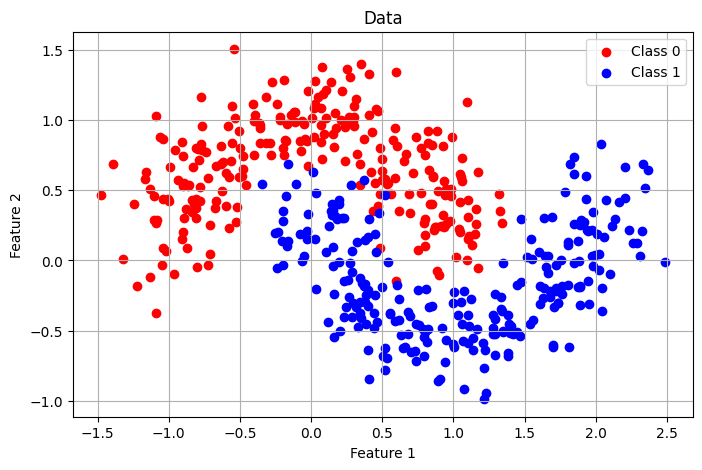

Standard SVM Accuracy: 0.85%
Manual SVM Accuracy: 0.46%
Adagrad SVM Accuracy: 0.45%
RFF SVM Accuracy: 0.50%


In [ ]:
# first combined version 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Generate non-linearly separable data using make_moons
def generate_non_linear_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y
# Load and standardize the dataset
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Train and evaluate a standard SVM
def train_standard_svm(X, y, test_size=0.2, C=1.0, kernel='linear'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Manual SVM implementation using gradient descent
def hinge_loss_gradient(w, x, y, lambda_reg):
    if y * np.dot(w, x) < 1:
        return -y * x + lambda_reg * w
    return lambda_reg * w

def train_manual_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                w -= eta * grad
    return w

def evaluate_svm(X, y, w):
    predictions = np.sign(X @ w)
    accuracy = np.mean(predictions == y)
    return accuracy

# SVM with Random Fourier Features (RFF)
def random_fourier_features(X, n_features, gamma=1.0):
    D = X.shape[1]
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    X_rff = np.sqrt(2 / n_features) * np.cos(np.dot(X, omega.T) + b)
    return X_rff

def train_and_evaluate_with_rff(X, y, n_features, gamma=1.0, C=1.0, eta=0.01, epochs=5, batch_size=10):
    X_rff = random_fourier_features(X, n_features, gamma)
    w = train_manual_svm(X_rff, y, epochs, eta, C, batch_size)
    accuracy = evaluate_svm(X_rff, y, w)
    return accuracy

def train_adagrad_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    g_accumulate = np.zeros(X.shape[1])  # Gradient accumulation for Adagrad
    epsilon = 1e-8  # Smoothing term to avoid division by zero
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                g_accumulate += grad**2
                adjusted_eta = eta / (np.sqrt(g_accumulate) + epsilon)
                w -= adjusted_eta * grad
    return w
def plot_data(X, y):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.title('Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    plt.figure(figsize=(8, 5))
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()
# Main execution
if __name__ == "__main__":
    file_path = "toydata_large.csv"  # Replace with your actual file path
    #X, y = load_dataset(file_path)
    X, y = generate_non_linear_data(n_samples=500, noise=0.2)
    plot_data(X, y)
    # Standard SVM
    standard_svm_accuracy = train_standard_svm(X, y)
    print(f"Standard SVM Accuracy: {standard_svm_accuracy:.2f}%")
    
    # Online/Manual SVM
    w_manual = train_manual_svm(X, y)
    manual_svm_accuracy = evaluate_svm(X, y, w_manual)
    print(f"Manual SVM Accuracy: {manual_svm_accuracy:.2f}%")
    
    # Adagrad SVM
    w_adagrad = train_adagrad_svm(X, y)
    adagrad_svm_accuracy = evaluate_svm(X, y, w_adagrad)
    print(f"Adagrad SVM Accuracy: {adagrad_svm_accuracy:.2f}%")
    
    # SVM with RFF
    rff_svm_accuracy = train_and_evaluate_with_rff(X, y, n_features=1000)
    print(f"RFF SVM Accuracy: {rff_svm_accuracy:.2f}%")


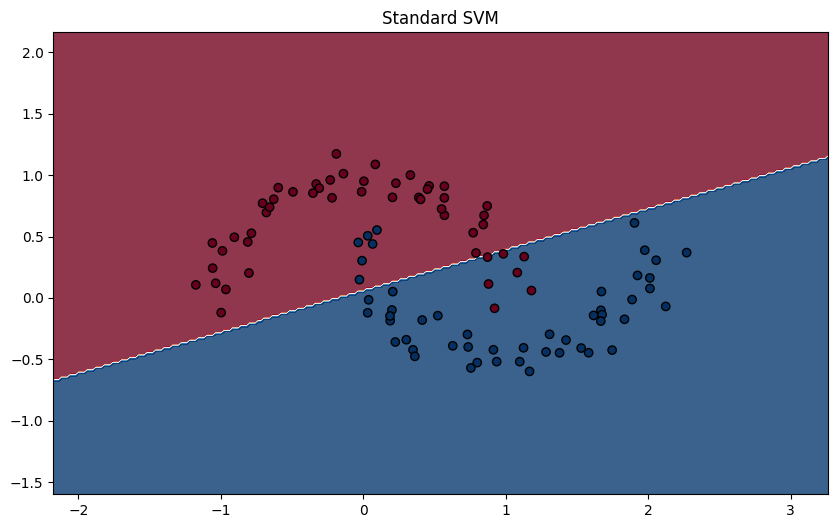

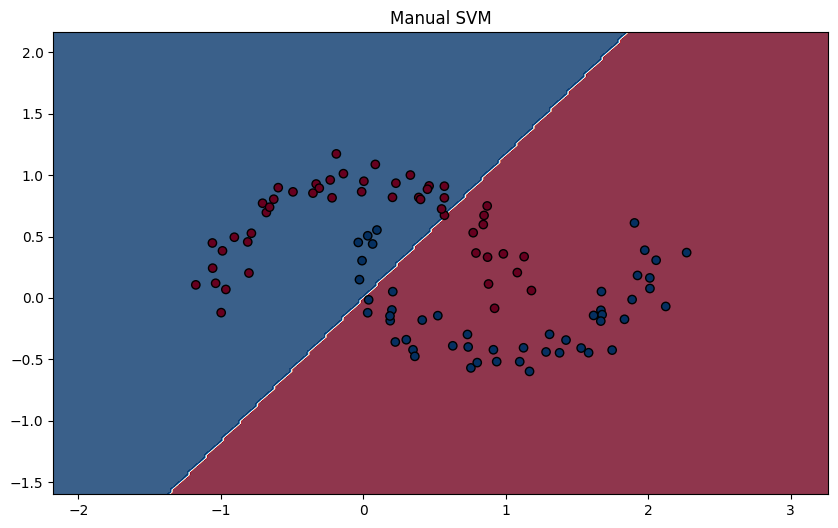

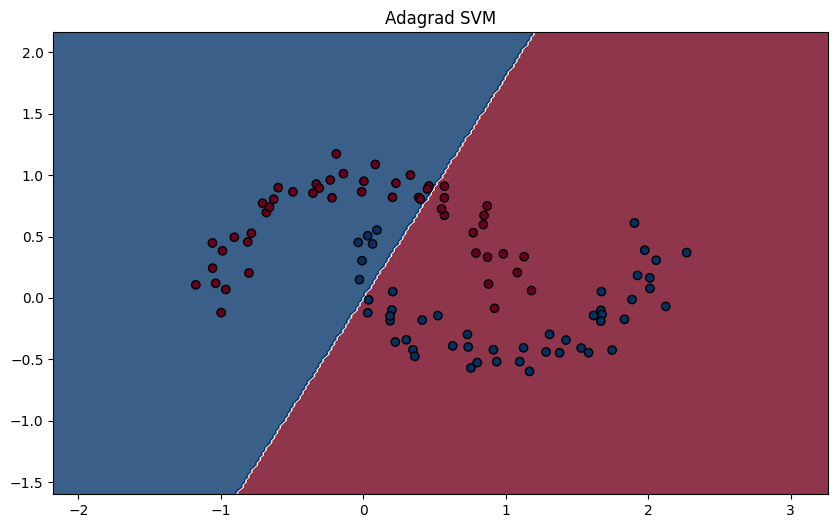

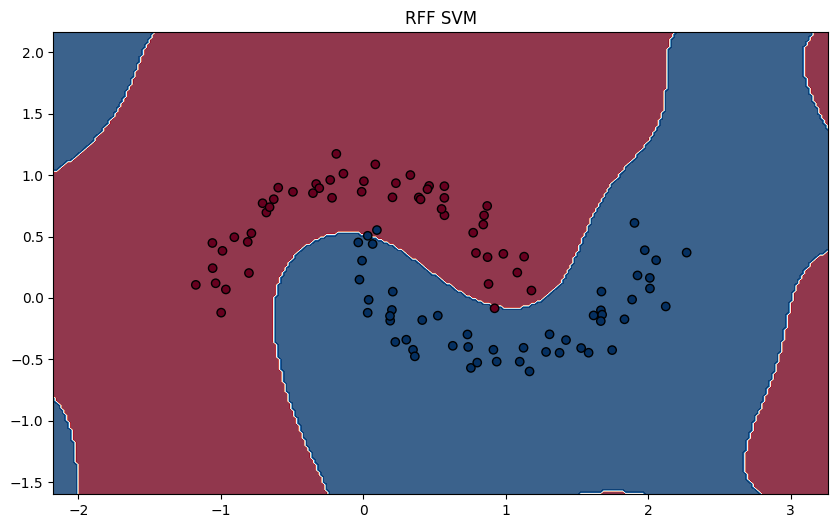

In [68]:
# first try combined with graphs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Generate non-linearly separable data using make_moons
def generate_non_linear_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y
# Load and standardize the dataset
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Train and evaluate a standard SVM
def train_standard_svm(X, y, test_size=0.2, C=1.0, kernel='linear'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Manual SVM implementation using gradient descent
def hinge_loss_gradient(w, x, y, lambda_reg):
    if y * np.dot(w, x) < 1:
        return -y * x + lambda_reg * w
    return lambda_reg * w

def train_manual_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                w -= eta * grad
    return w

def evaluate_svm(X, y, w):
    predictions = np.sign(X @ w)
    accuracy = np.mean(predictions == y)
    return accuracy

# SVM with Random Fourier Features (RFF)
def random_fourier_features(X, n_features, gamma=1.0):
    D = X.shape[1]
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    X_rff = np.sqrt(2 / n_features) * np.cos(np.dot(X, omega.T) + b)
    return X_rff

def train_and_evaluate_with_rff(X, y, n_features, gamma=1.0, C=1.0, eta=0.01, epochs=5, batch_size=10):
    X_rff = random_fourier_features(X, n_features, gamma)
    w = train_manual_svm(X_rff, y, epochs, eta, C, batch_size)
    accuracy = evaluate_svm(X_rff, y, w)
    return accuracy

def train_adagrad_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    g_accumulate = np.zeros(X.shape[1])  # Gradient accumulation for Adagrad
    epsilon = 1e-8  # Smoothing term to avoid division by zero
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                g_accumulate += grad**2
                adjusted_eta = eta / (np.sqrt(g_accumulate) + epsilon)
                w -= adjusted_eta * grad
    return w
def decision_function(X, w):
    return np.sign(np.dot(X, w))

# Generate Random Fourier Features
def generate_rff_parameters(n_features, D, gamma=1.0):
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    return omega, b

def apply_rff(X, omega, b):
    X_rff = np.sqrt(2 / omega.shape[0]) * np.cos(np.dot(X, omega.T) + b)
    return X_rff

# Decision function for SVMs
def decision_function(X, w):
    return np.sign(np.dot(X, w))

# Plot decision boundary
def plot_decision_boundary(X, y, model_func, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model_func(grid).reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="k")
    plt.title(title)
    plt.show()
# Main execution
if __name__ == "__main__":
    X, y = generate_non_linear_data()

    # SVM with sklearn
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plot_decision_boundary(X, y, lambda x: clf.predict(x), "Standard SVM")

    # Manual SVM - Assuming weights are trained and available as 'w_manual'
    # For demonstration, use random weights
    w_manual = np.random.randn(X.shape[1])
    plot_decision_boundary(X, y, lambda x: decision_function(x, w_manual), "Manual SVM")

    # Adagrad SVM - Assuming weights are trained and available as 'w_adagrad'
    w_adagrad = np.random.randn(X.shape[1])
    plot_decision_boundary(X, y, lambda x: decision_function(x, w_adagrad), "Adagrad SVM")

    D = X.shape[1]  # Number of original features
    n_features = 300  # Number of Random Fourier Features
    gamma = 1.0  # Scale for the RFF

    # Generate RFF parameters
    omega, b = generate_rff_parameters(n_features, D, gamma)

    # Apply RFF to the original data
    X_rff = apply_rff(X, omega, b)

    # SVM with sklearn on RFF
    clf_rff = SVC(kernel='linear')
    clf_rff.fit(X_rff, y)

    # Plot decision boundary for RFF SVM
    plot_decision_boundary(X, y, lambda x: clf_rff.predict(apply_rff(x, omega, b)), "RFF SVM")


Accuracy of Standard SVM: 1.0000


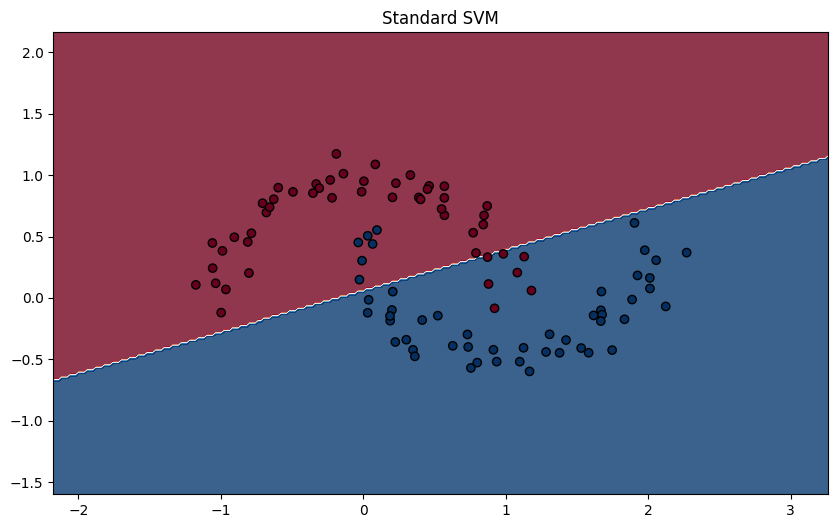

Accuracy of Manual SVM: 0.4600


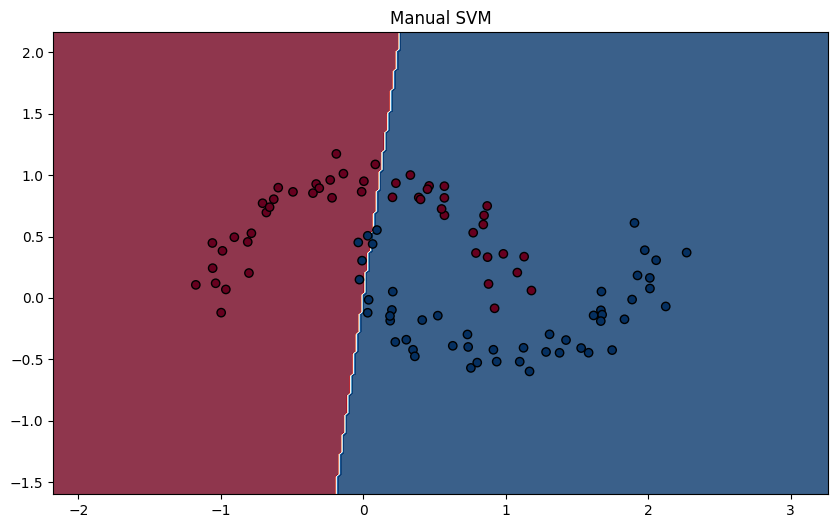

Accuracy of Adagrad SVM: 0.4400


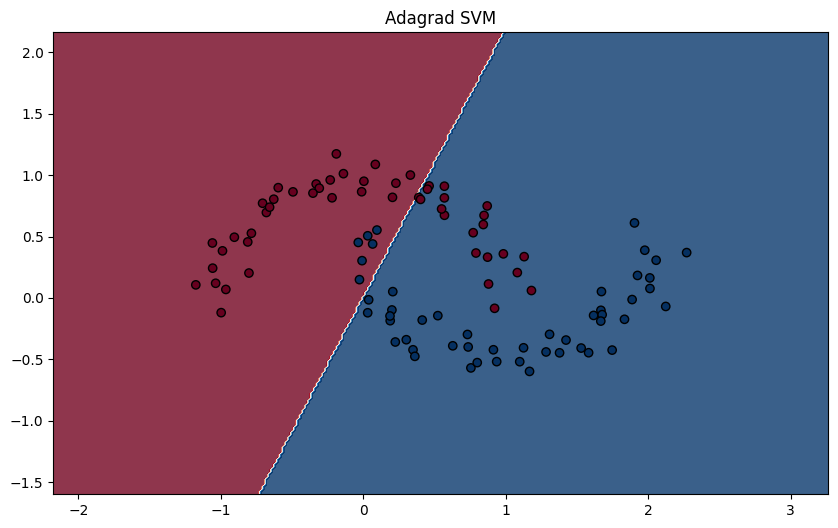

Accuracy of RFF SVM: 0.9800


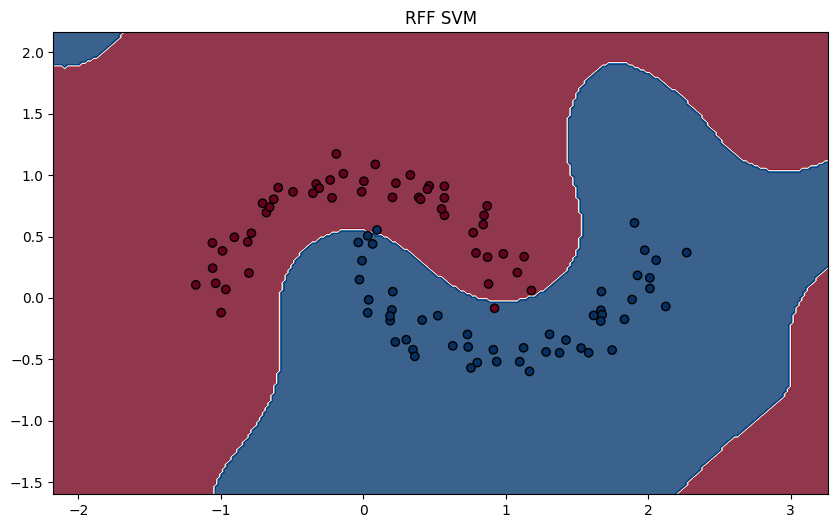

In [77]:
# hier ist rff irgendwie insane gut 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Generate non-linearly separable data using make_moons
def generate_non_linear_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y

# Load and standardize the dataset
def load_dataset(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y

# Train and evaluate a standard SVM
def train_standard_svm(X, y, test_size=0.2, C=1.0, kernel='linear'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Manual SVM implementation using gradient descent
def hinge_loss_gradient(w, x, y, lambda_reg):
    if y * np.dot(w, x) < 1:
        return -y * x + lambda_reg * w
    return lambda_reg * w

def train_manual_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                w -= eta * grad
    return w

def evaluate_svm(X, y, w):
    predictions = np.sign(X @ w)
    accuracy = np.mean(predictions == y)
    return accuracy

# SVM with Random Fourier Features (RFF)
def random_fourier_features(X, n_features, gamma=1.0):
    D = X.shape[1]
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    X_rff = np.sqrt(2 / n_features) * np.cos(np.dot(X, omega.T) + b)
    return X_rff

def train_and_evaluate_with_rff(X, y, n_features, gamma=1.0, C=1.0, eta=0.01, epochs=5, batch_size=10):
    X_rff = random_fourier_features(X, n_features, gamma)
    w = train_manual_svm(X_rff, y, epochs, eta, C, batch_size)
    accuracy = evaluate_svm(X_rff, y, w)
    return accuracy

def train_adagrad_svm(X, y, epochs=1, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    g_accumulate = np.zeros(X.shape[1])  # Gradient accumulation for Adagrad
    epsilon = 1e-8  # Smoothing term to avoid division by zero
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                g_accumulate += grad**2
                adjusted_eta = eta / (np.sqrt(g_accumulate) + epsilon)
                w -= adjusted_eta * grad
    return w

def decision_function(X, w):
    return np.sign(np.dot(X, w))

# Generate Random Fourier Features
def generate_rff_parameters(n_features, D, gamma=1.0):
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    return omega, b

def apply_rff(X, omega, b):
    X_rff = np.sqrt(2 / omega.shape[0]) * np.cos(np.dot(X, omega.T) + b)
    return X_rff

# Decision function for SVMs
def decision_function(X, w):
    return np.sign(np.dot(X, w))

# Plot decision boundary
def plot_decision_boundary(X, y, model_func, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model_func(grid).reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="k")
    plt.title(title)
    plt.show()


# Main execution
if __name__ == "__main__":
    X, y = generate_non_linear_data()

    # SVM with sklearn
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    accuracy_standard_svm = train_standard_svm(X, y)
    print(f"Accuracy of Standard SVM: {accuracy_standard_svm:.4f}")
    plot_decision_boundary(X, y, lambda x: clf.predict(x), "Standard SVM")

    # Manual SVM
    w_manual = train_manual_svm(X, y)
    accuracy_manual_svm = evaluate_svm(X, y, w_manual)
    print(f"Accuracy of Manual SVM: {accuracy_manual_svm:.4f}")
    plot_decision_boundary(X, y, lambda x: decision_function(x, w_manual), "Manual SVM")

    # Adagrad SVM
    w_adagrad = train_adagrad_svm(X, y)
    accuracy_adagrad_svm = evaluate_svm(X, y, w_adagrad)
    print(f"Accuracy of Adagrad SVM: {accuracy_adagrad_svm:.4f}")
    plot_decision_boundary(X, y, lambda x: decision_function(x, w_adagrad), "Adagrad SVM")

    D = X.shape[1]  # Number of original features
    n_features = 300  # Number of Random Fourier Features
    gamma = 1.0  # Scale for the RFF

    # Generate RFF parameters
    omega, b = generate_rff_parameters(n_features, D, gamma)

    # Apply RFF to the original data
    X_rff = apply_rff(X, omega, b)

    # SVM with sklearn on RFF
    clf_rff = SVC(kernel='linear')
    clf_rff.fit(X_rff, y)
    accuracy_rff_svm = accuracy_score(y, clf_rff.predict(X_rff))
    print(f"Accuracy of RFF SVM: {accuracy_rff_svm:.4f}")
    plot_decision_boundary(X, y, lambda x: clf_rff.predict(apply_rff(x, omega, b)), "RFF SVM")

Accuracy of Standard SVM: 1.0000


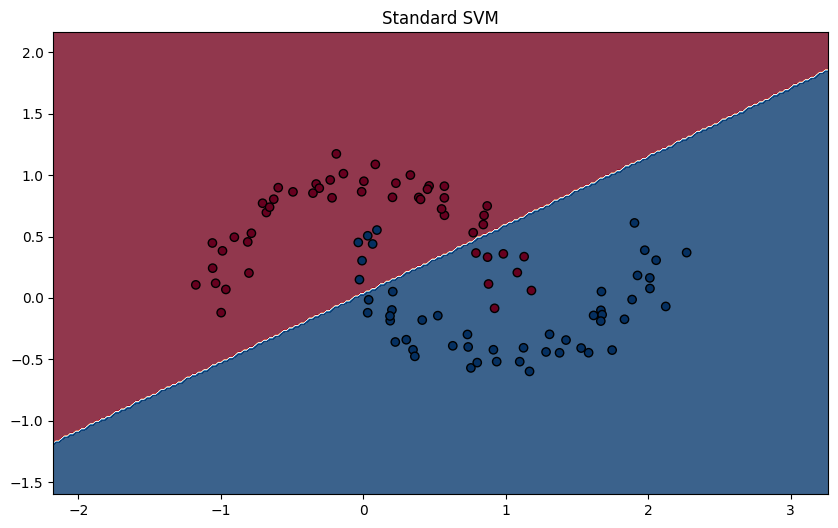

Accuracy of Standard SVM: 1.0000


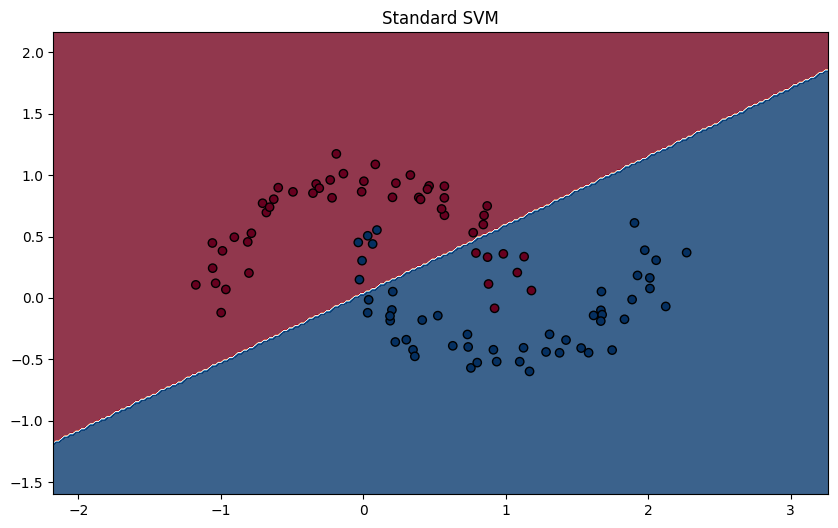

Accuracy of Standard SVM: 1.0000


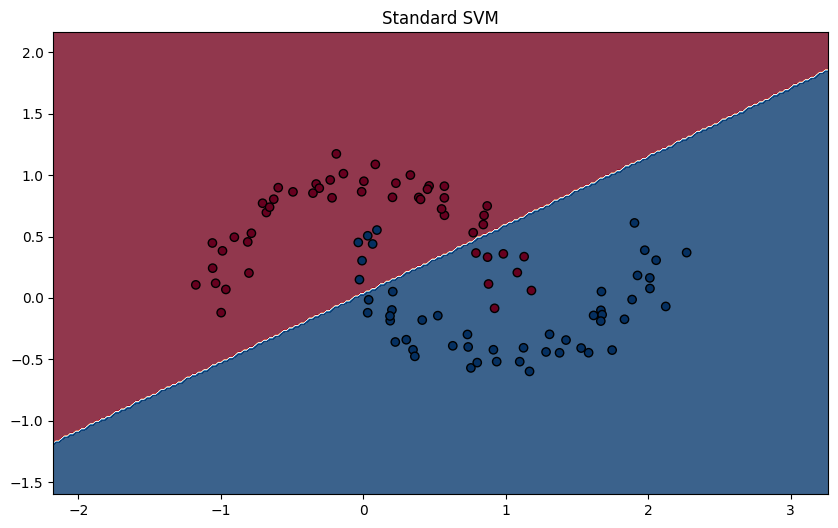

Accuracy of Manual SVM with lambda=0.001, eta=0.01: 0.4400


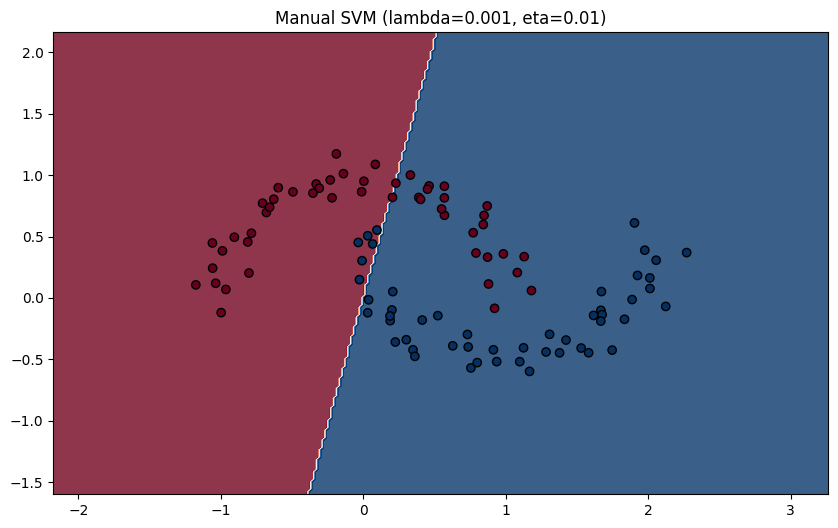

Accuracy of Manual SVM with lambda=0.001, eta=0.1: 0.4800


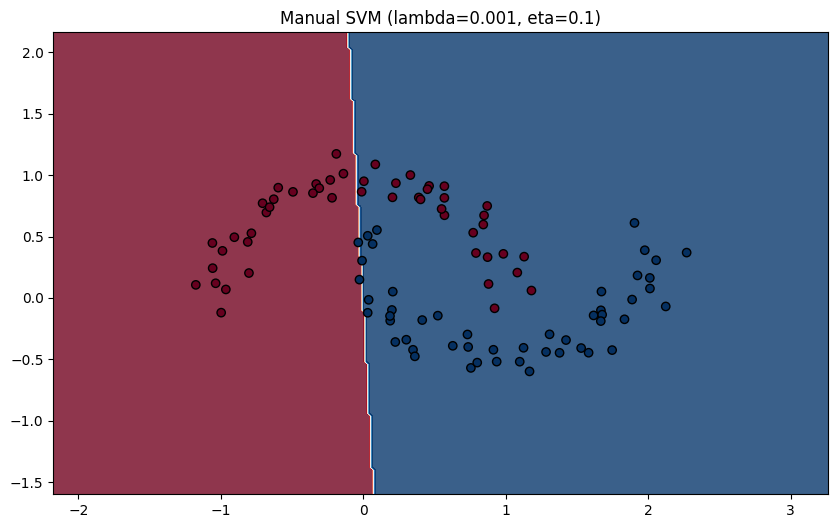

Accuracy of Manual SVM with lambda=0.001, eta=1.0: 0.4900


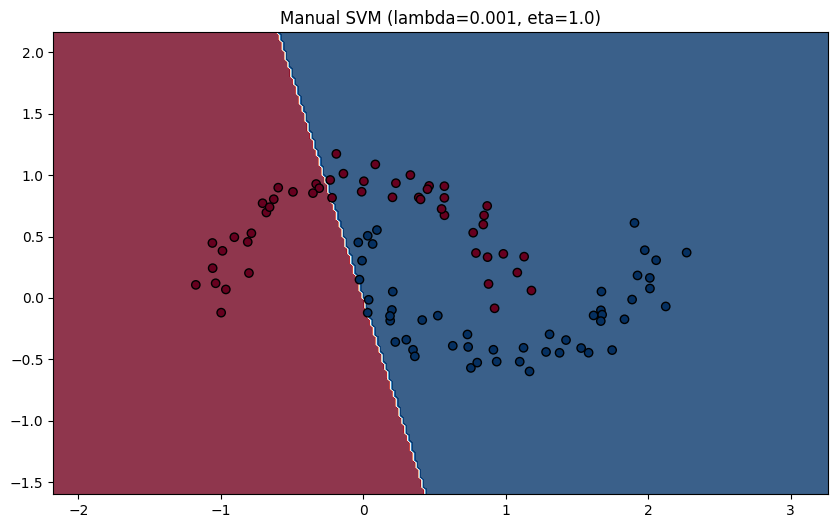

Accuracy of Manual SVM with lambda=0.01, eta=0.01: 0.4400


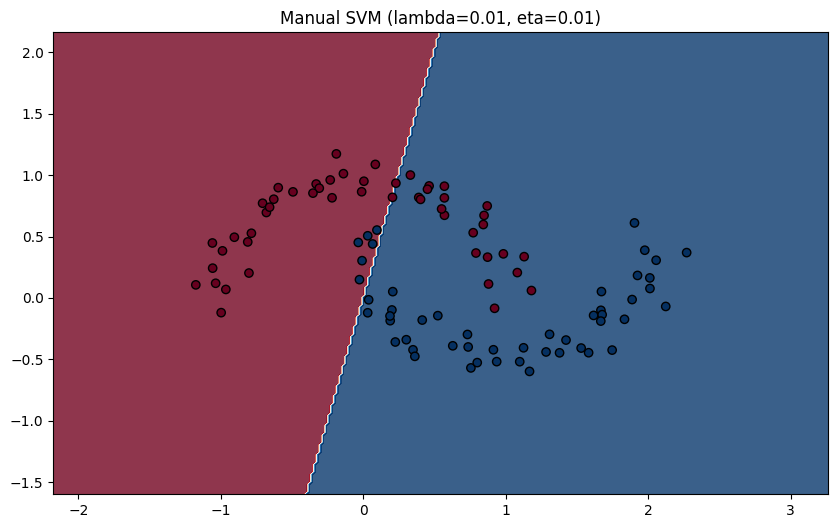

Accuracy of Manual SVM with lambda=0.01, eta=0.1: 0.4700


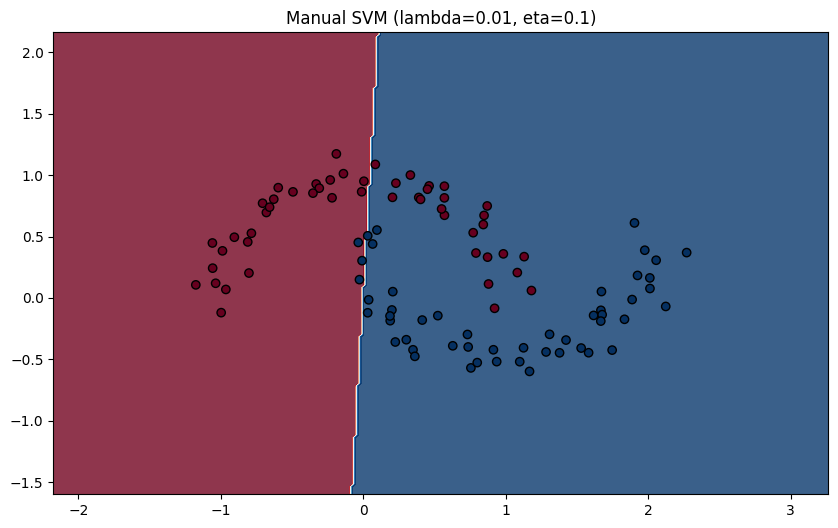

Accuracy of Manual SVM with lambda=0.01, eta=1.0: 0.4900


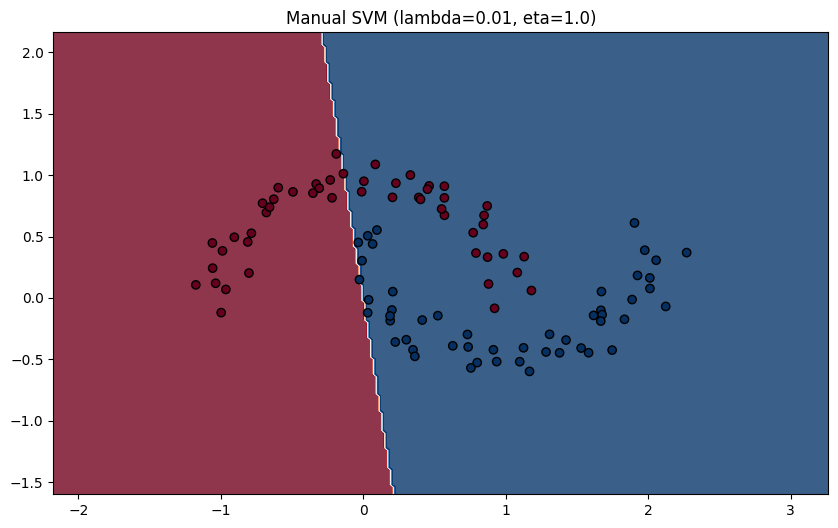

Accuracy of Manual SVM with lambda=0.1, eta=0.01: 0.4400


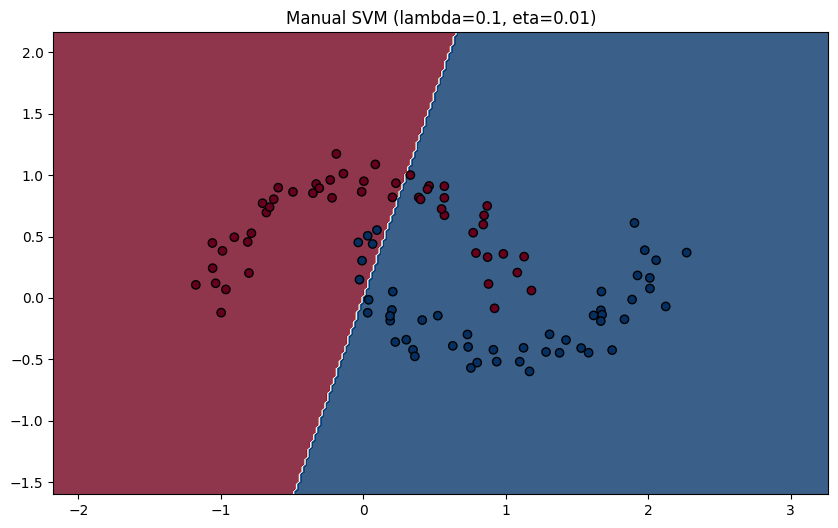

Accuracy of Manual SVM with lambda=0.1, eta=0.1: 0.4400


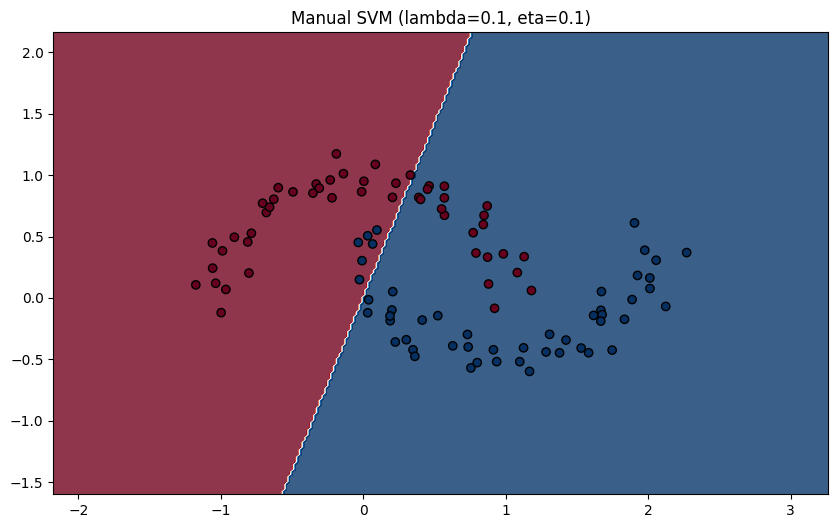

Accuracy of Manual SVM with lambda=0.1, eta=1.0: 0.4900


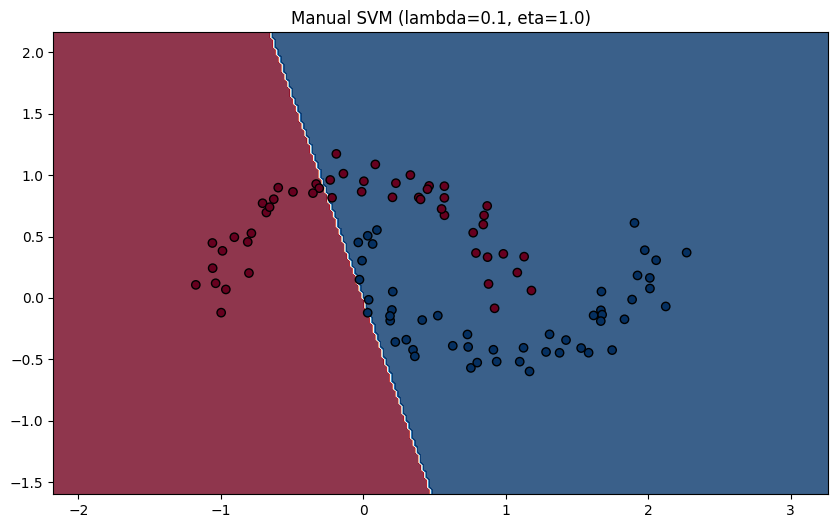

Accuracy of Adagrad SVM with lambda=0.001, eta=0.01: 0.4400


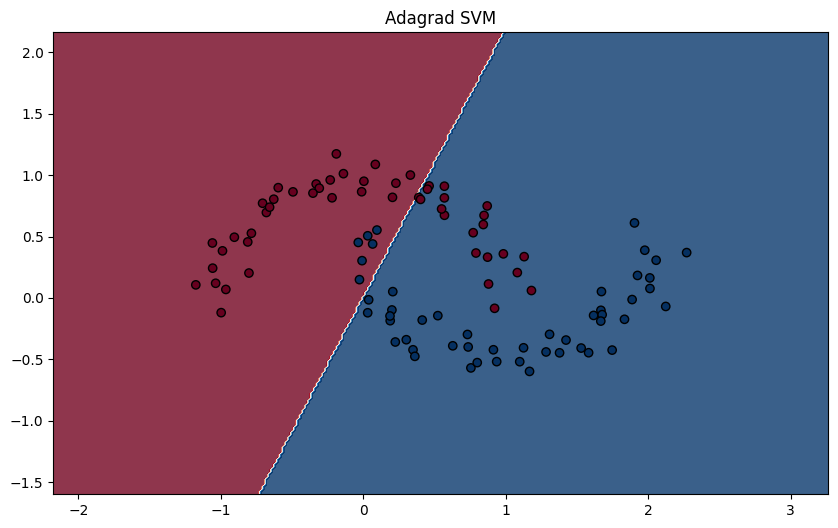

Accuracy of Adagrad SVM with lambda=0.001, eta=0.1: 0.4400


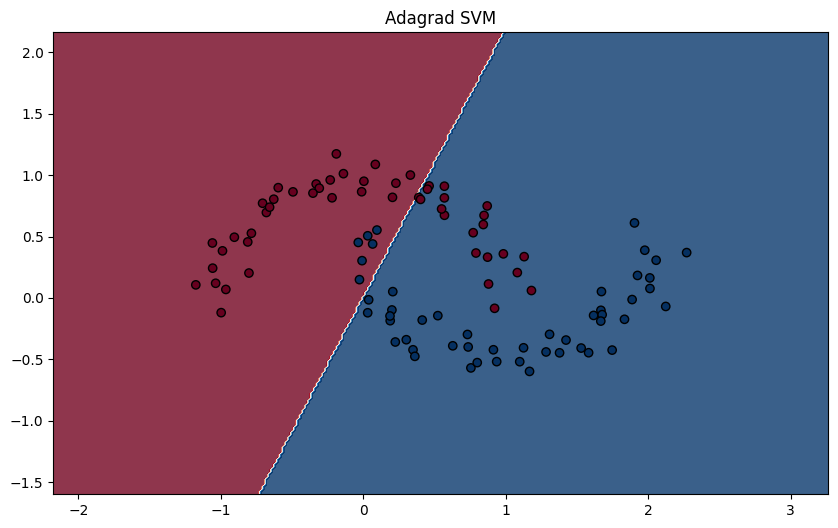

Accuracy of Adagrad SVM with lambda=0.001, eta=1.0: 0.4400


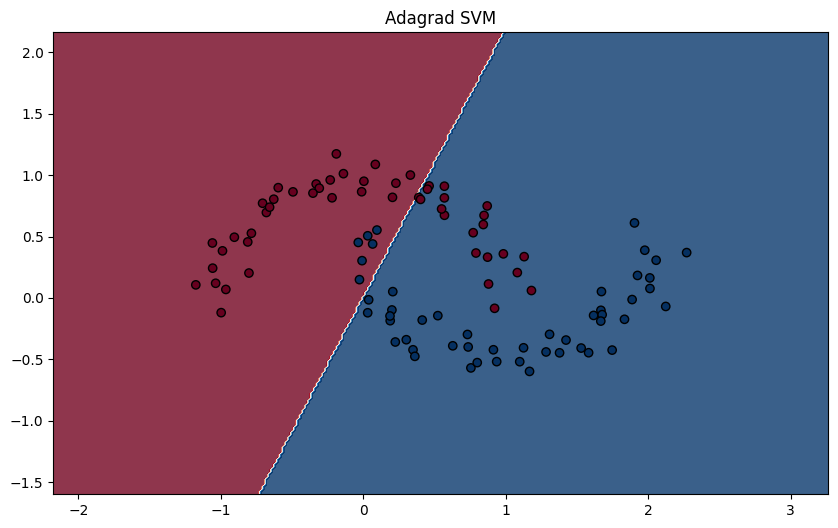

Accuracy of Adagrad SVM with lambda=0.01, eta=0.01: 0.4400


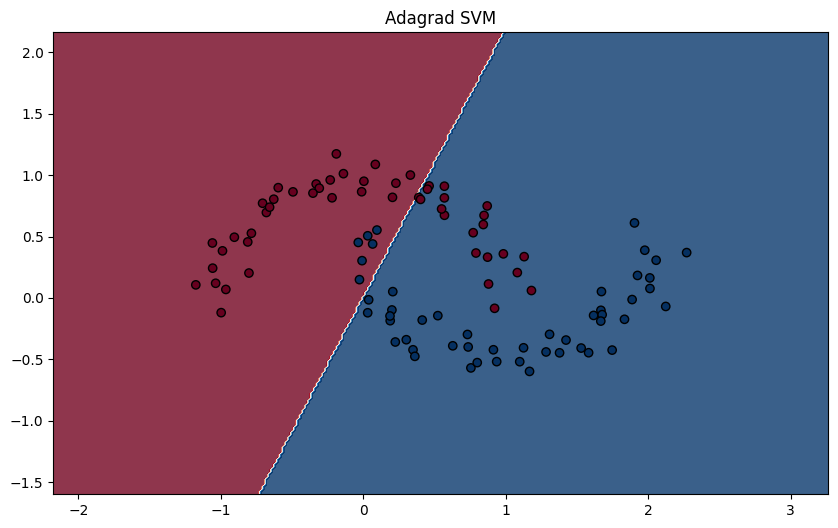

Accuracy of Adagrad SVM with lambda=0.01, eta=0.1: 0.4400


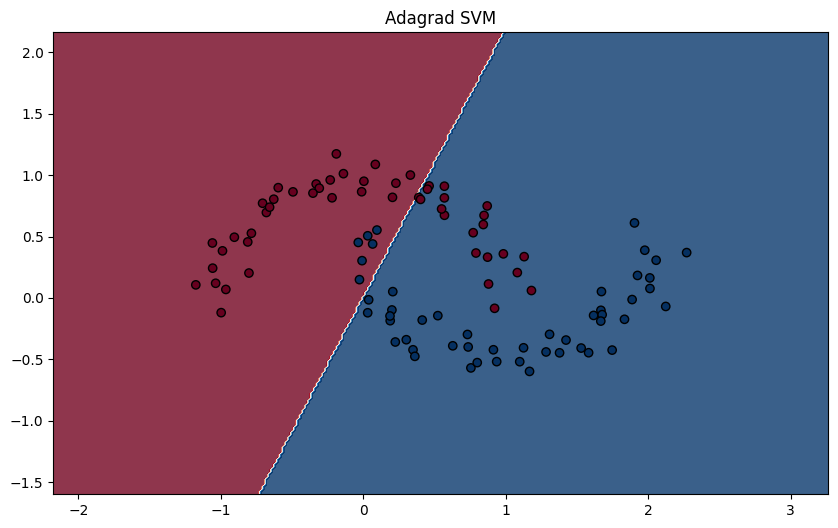

Accuracy of Adagrad SVM with lambda=0.01, eta=1.0: 0.4400


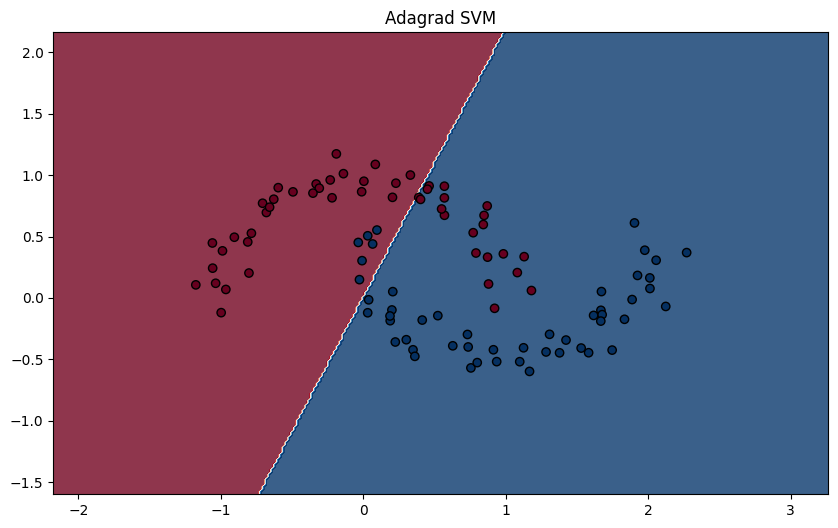

Accuracy of Adagrad SVM with lambda=0.1, eta=0.01: 0.4400


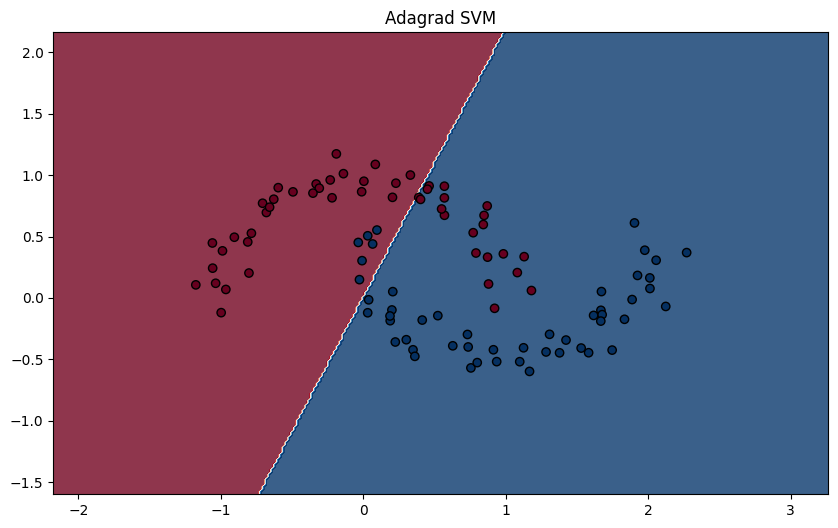

Accuracy of Adagrad SVM with lambda=0.1, eta=0.1: 0.4400


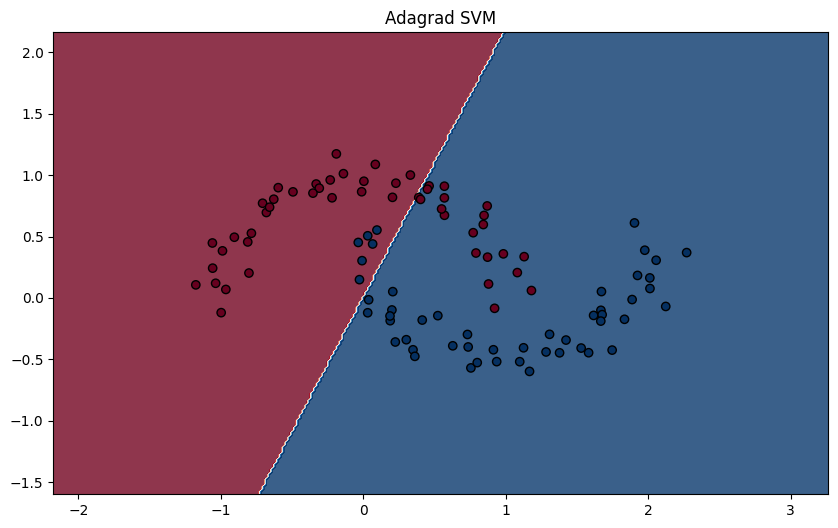

Accuracy of Adagrad SVM with lambda=0.1, eta=1.0: 0.4400


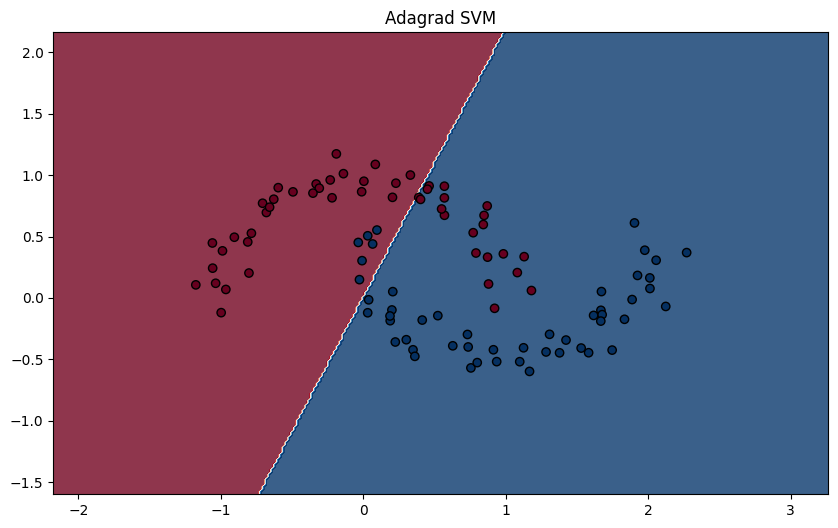

Accuracy of RFF SVM with lambda=0.001, eta=0.01: 0.2500


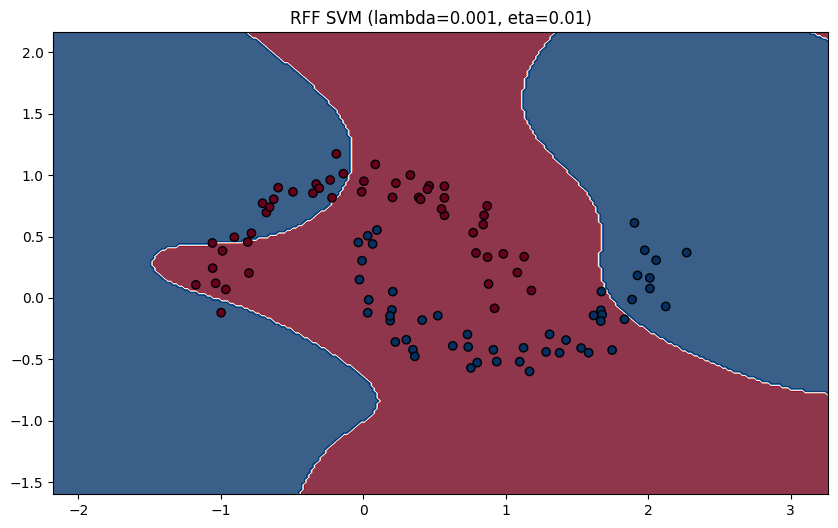

Accuracy of RFF SVM with lambda=0.001, eta=0.1: 0.4100


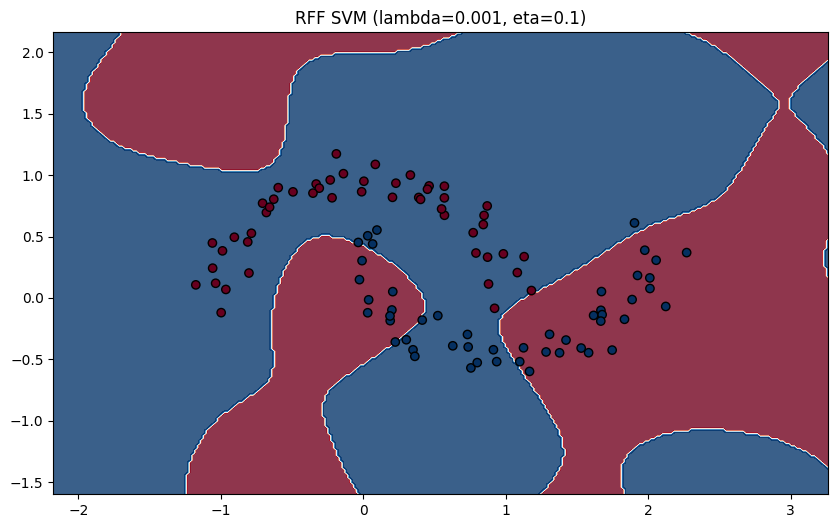

Accuracy of RFF SVM with lambda=0.001, eta=1.0: 0.1100


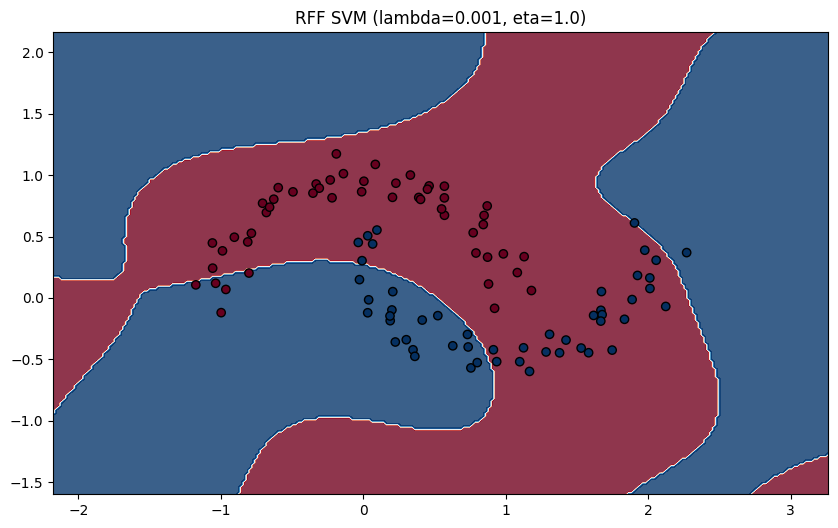

Accuracy of RFF SVM with lambda=0.01, eta=0.01: 0.4800


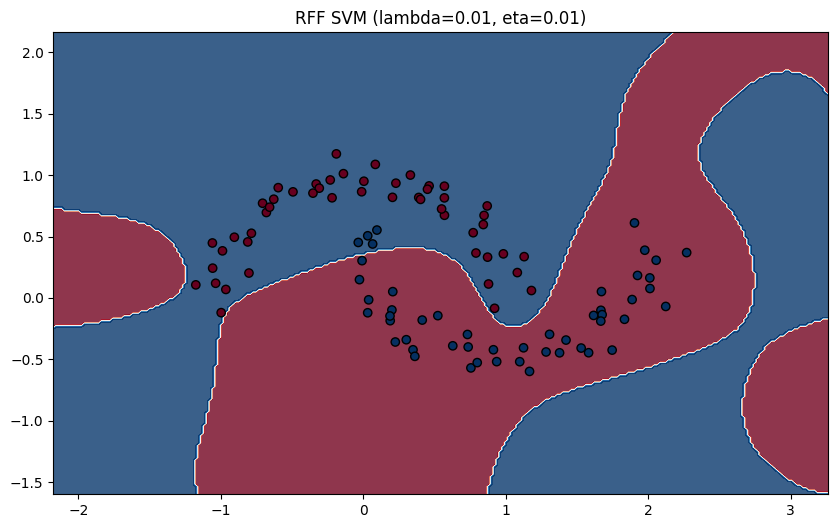

Accuracy of RFF SVM with lambda=0.01, eta=0.1: 0.0100


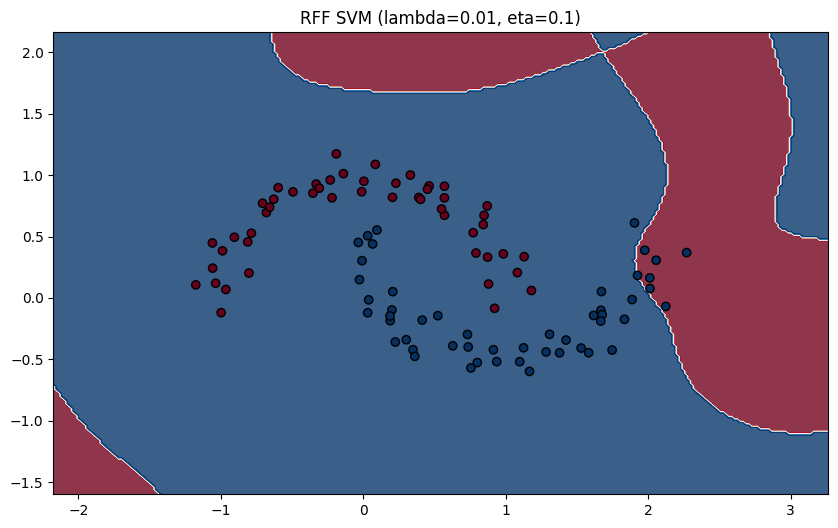

Accuracy of RFF SVM with lambda=0.01, eta=1.0: 0.0400


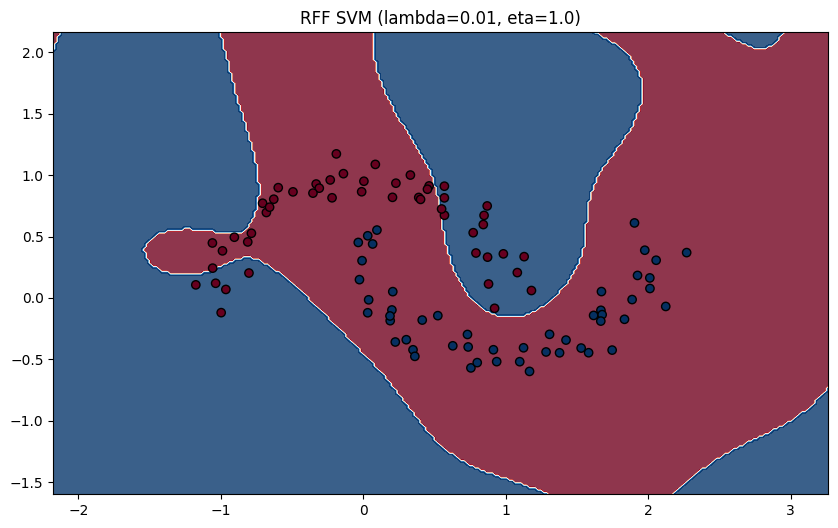

Accuracy of RFF SVM with lambda=0.1, eta=0.01: 0.1800


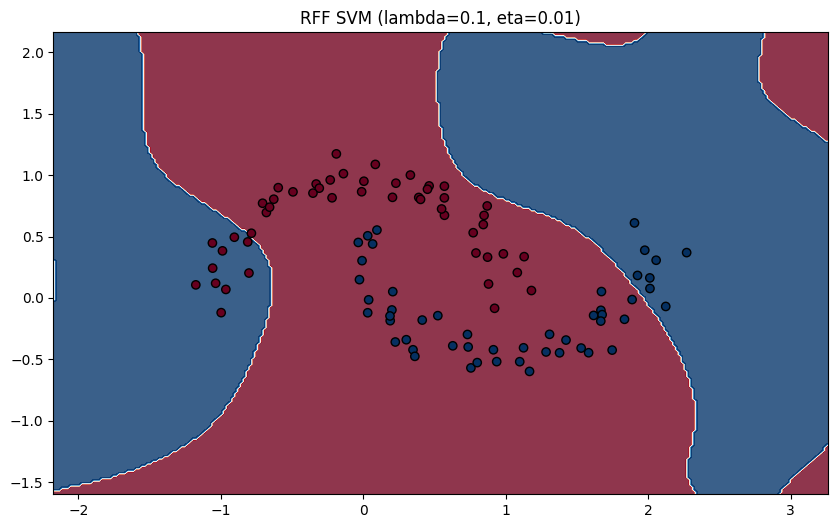

Accuracy of RFF SVM with lambda=0.1, eta=0.1: 0.3200


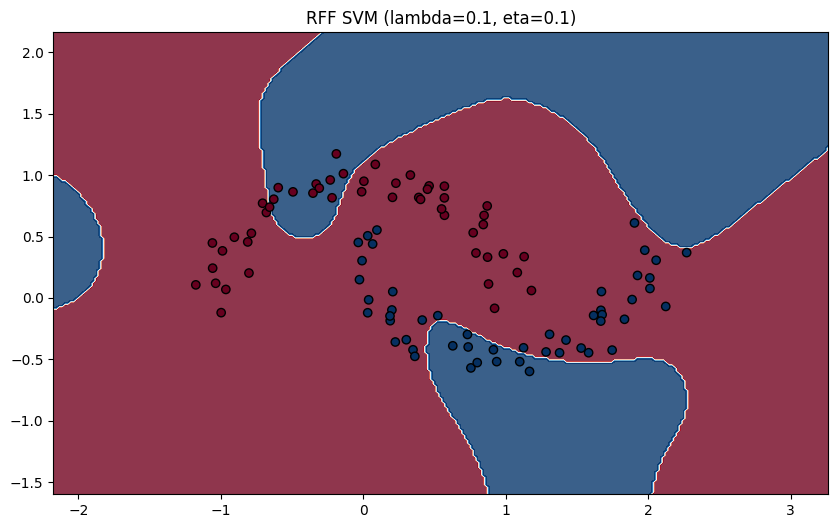

Accuracy of RFF SVM with lambda=0.1, eta=1.0: 0.1600


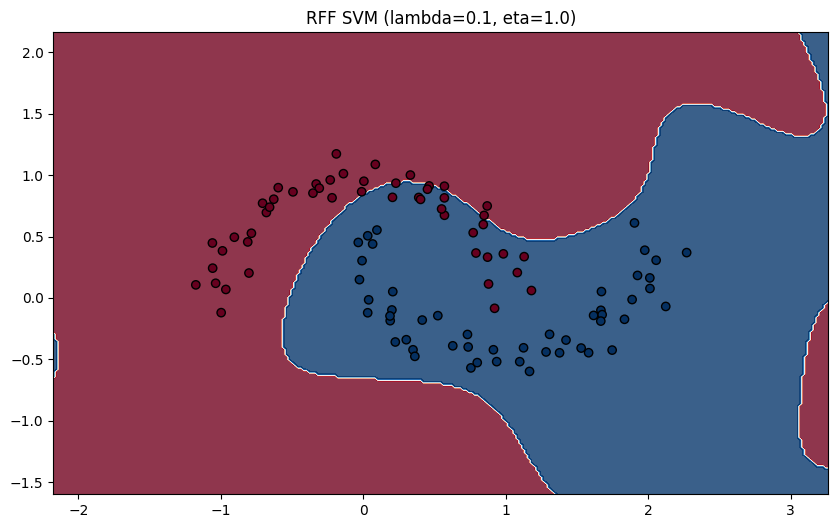

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

# Generate non-linearly separable data using make_moons
def generate_non_linear_data(n_samples=100, noise=0.1):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    return X, y

# Manual SVM implementation using gradient descent
def hinge_loss_gradient(w, x, y, lambda_reg):
    if y * np.dot(w, x) < 1:
        return -y * x + lambda_reg * w
    return lambda_reg * w

def train_manual_svm(X, y, epochs=10, eta=0.01, lambda_reg=0.01, batch_size=10):
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(0, X.shape[0], batch_size):
            end = i + batch_size
            X_batch, y_batch = X[i:end], y[i:end]
            for x, y_true in zip(X_batch, y_batch):
                grad = hinge_loss_gradient(w, x, y_true, lambda_reg)
                w -= eta * grad
    return w

def evaluate_svm(X, y, w):
    predictions = np.sign(X @ w)
    accuracy = np.mean(predictions == y)
    return accuracy

# SVM with Random Fourier Features (RFF)
def random_fourier_features(X, n_features, gamma=1.0):
    D = X.shape[1]
    omega = np.sqrt(2 * gamma) * np.random.randn(n_features, D)
    b = np.random.uniform(0, 2 * np.pi, n_features)
    X_rff = np.sqrt(2 / n_features) * np.cos(np.dot(X, omega.T) + b)
    return X_rff

def train_rff_svm(X, y, n_features, gamma=1.0, epochs=10, eta=0.01, lambda_reg=0.01, batch_size=10):
    X_rff = random_fourier_features(X, n_features, gamma)
    w = train_manual_svm(X_rff, y, epochs, eta, lambda_reg, batch_size)
    return w

def evaluate_rff_svm(X, y, w, n_features, gamma=1.0):
    X_rff = random_fourier_features(X, n_features, gamma)
    accuracy = evaluate_svm(X_rff, y, w)
    return accuracy

# Decision function for SVMs
def decision_function(X, w):
    return np.sign(np.dot(X, w))

# Plot decision boundary
def plot_decision_boundary(X, y, model_func, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model_func(grid).reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors="k")
    plt.title(title)
    plt.show()

# Main execution
if __name__ == "__main__":
    X, y = generate_non_linear_data()

    # Standard SVM
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    from sklearn.svm import SVC
    
    # Test different values of C (regularization parameter)
    C_values = [0.1, 1.0, 10.0]
    for c in C_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        from sklearn.svm import SVC
        clf = SVC(kernel='linear', C=C)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy_standard_svm = accuracy_score(y_test, y_pred)
        print(f"Accuracy of Standard SVM: {accuracy_standard_svm:.4f}")
        plot_decision_boundary(X, y, lambda x: clf.predict(x), "Standard SVM")

    # Manual SVM
    epochs = 10
    lambda_reg_values = [0.001, 0.01, 0.1]
    eta_values = [0.01, 0.1, 1.0]
    for lambda_reg in lambda_reg_values:
        for eta in eta_values:
            w_manual = train_manual_svm(X, y, epochs=epochs, eta=eta, lambda_reg=lambda_reg)
            accuracy_manual_svm = evaluate_svm(X, y, w_manual)
            print(f"Accuracy of Manual SVM with lambda={lambda_reg}, eta={eta}: {accuracy_manual_svm:.4f}")
            plot_decision_boundary(X, y, lambda x: decision_function(x, w_manual), f"Manual SVM (lambda={lambda_reg}, eta={eta})")
            
    # Ada
    epochs = 10
    lambda_reg_values = [0.001, 0.01, 0.1]
    eta_values = [0.01, 0.1, 1.0]
    for lambda_reg in lambda_reg_values:
        for eta in eta_values:
            w_adagrad = train_adagrad_svm(X, y)
            accuracy_adagrad_svm = evaluate_svm(X, y, w_adagrad)
            print(f"Accuracy of Adagrad SVM with lambda={lambda_reg}, eta={eta}: {accuracy_adagrad_svm:.4f}")
            plot_decision_boundary(X, y, lambda x: decision_function(x, w_adagrad), "Adagrad SVM")

    D = X.shape[1]  # Number of original features
    n_features = 300  # Number of Random Fourier Features
    gamma = 1.0  # Scale for the RFF

    # Train and evaluate RFF SVM
    epochs = 10
    lambda_reg_values = [0.001, 0.01, 0.1]
    eta_values = [0.01, 0.1, 1.0]
    for lambda_reg in lambda_reg_values:
        for eta in eta_values:
            w_rff = train_rff_svm(X, y, n_features, gamma, epochs=epochs, eta=eta, lambda_reg=lambda_reg)
            accuracy_rff_svm = evaluate_rff_svm(X, y, w_rff, n_features, gamma)
            print(f"Accuracy of RFF SVM with lambda={lambda_reg}, eta={eta}: {accuracy_rff_svm:.4f}")
            plot_decision_boundary(X, y, lambda x: decision_function(random_fourier_features(x, n_features, gamma), w_rff), f"RFF SVM (lambda={lambda_reg}, eta={eta})")